# Import

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Load Dataset

In [12]:
df = pd.read_csv('framingham_heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [15]:
df.shape

(4238, 16)

In [16]:

# Get total percentages of null values to know if dropping the values would affect the dataset
(df.isnull().sum()/4238)*100

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [17]:
df.dropna(inplace=True)

In [18]:
X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = df['TenYearCHD']

# Check relationship btw values

In [4]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


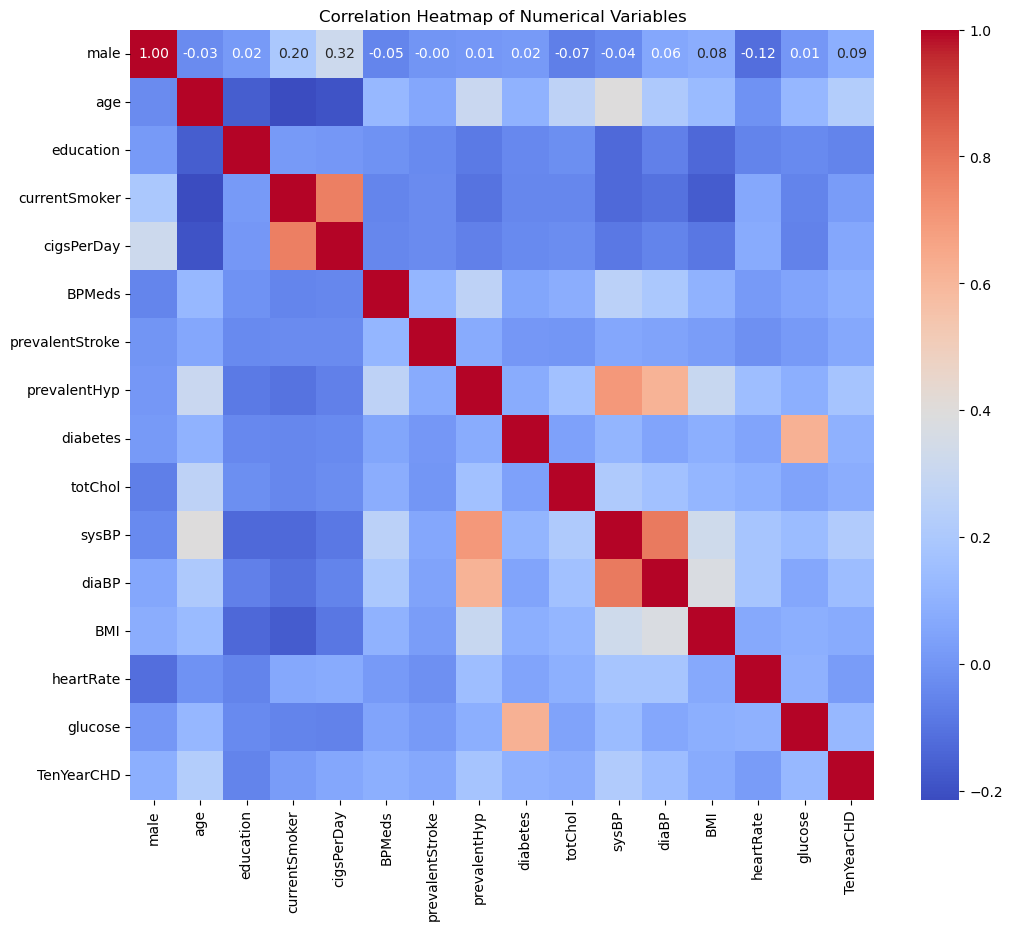

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Visualize Data

## distribution of ages for individuals with and without coronary heart disease within ten years.

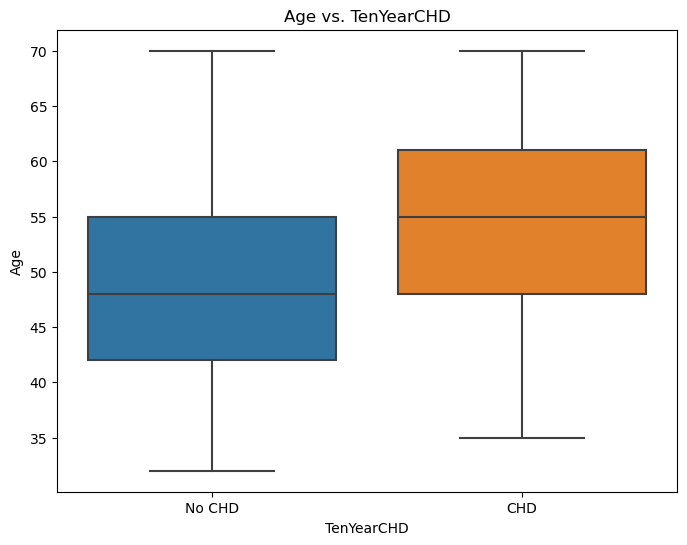

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title('Age vs. TenYearCHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Age')
plt.xticks([0, 1], ['No CHD', 'CHD'])
plt.show()


# Split Data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Feature Scalling (Standardization/normalization)

## Train

In [22]:
scaler = StandardScaler().fit(x_train)

In [24]:
#transform
x_train_scaled = scaler.transform(x_train)
x_train_scaled

array([[-8.95308256e-01, -9.96059320e-01,  2.81283510e-02, ...,
        -3.10943585e-01, -2.22200441e-01, -8.87061007e-01],
       [ 1.11693374e+00, -1.34810813e+00,  2.81283510e-02, ...,
        -1.32759504e+00, -1.30350514e+00, -2.99387120e-03],
       [-8.95308256e-01, -7.61360115e-01,  1.98073439e+00, ...,
        -3.15819611e-01,  1.02545883e+00, -8.02864137e-01],
       ...,
       [ 1.11693374e+00,  9.98883928e-01, -9.48174669e-01, ...,
         9.78765340e-01, -5.58458719e-02,  2.07498304e-01],
       [ 1.11693374e+00,  8.81534325e-01, -9.48174669e-01, ...,
         2.99987819e+00, -6.38086863e-01,  5.02187350e-01],
       [ 1.11693374e+00, -1.11340892e+00, -9.48174669e-01, ...,
         2.93683662e-01, -1.30350514e+00, -4.66076657e-01]])

## Test

In [25]:
scaler1 = StandardScaler().fit(x_test)

In [26]:
#transform
x_test_scaled = scaler1.transform(x_test)
x_test_scaled

array([[-0.88609043,  1.6416073 , -0.00538006, ...,  2.42750134,
         2.03220046, -0.09081215],
       [-0.88609043, -1.70293099, -0.00538006, ..., -1.26332124,
         1.18868038, -0.04974223],
       [ 1.12855299, -1.35694427, -0.00538006, ..., -1.32660695,
         0.3451603 ,  0.36095695],
       ...,
       [ 1.12855299, -0.0883263 , -0.00538006, ..., -1.61265836,
         0.17645628,  0.15560736],
       [ 1.12855299,  0.60364714, -0.98885541, ..., -0.37478988,
         0.09210427, -0.29616174],
       [-0.88609043, -0.54964192, -0.00538006, ...,  0.16187294,
        -0.6670638 , -0.58365117]])

# Train Model

## scaled

In [31]:
clf = GaussianNB()
clf.fit(x_train_scaled, y_train)

GaussianNB()

In [32]:
y_pred = clf.predict(x_test_scaled)

## Unscaled

In [33]:
clf_un = GaussianNB()
clf_un.fit(x_train, y_train)

GaussianNB()

In [34]:
y_pred_un = clf.predict(x_test)

C:\Users\obasi\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# Evaluate Model

## Scaled

In [42]:
print(confusion_matrix(y_test, y_pred))


[[719  61]
 [106  28]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       780
           1       0.31      0.21      0.25       134

    accuracy                           0.82       914
   macro avg       0.59      0.57      0.57       914
weighted avg       0.79      0.82      0.80       914



## Unscalled

In [44]:
print(confusion_matrix(y_test, y_pred_un))


[[  0 780]
 [  0 134]]


In [37]:

print(classification_report(y_test,y_pred_un))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       780
           1       0.15      1.00      0.26       134

    accuracy                           0.15       914
   macro avg       0.07      0.50      0.13       914
weighted avg       0.02      0.15      0.04       914



C:\Users\obasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\obasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\obasi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
